<a href="https://colab.research.google.com/github/kathelynn/allysaqt/blob/main/waifu2x_ncnn_vulkan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# waifu2x-ncnn-vulkan in Google Colab by kathelynn
[ncnn-vulkan](https://github.com/nihui/waifu2x-ncnn-vulkan) is an alternative to [caffe](https://github.com/lltcggie/waifu2x-caffe).

The ipynb for caffe will be available in the near future that utilizes Google Colab's GPU.

This is CPU only but GPU can be enabled with a slight bit of tweaking.

# Initialization
Start the first block of code to initialize waifu2x. Do this by hovering on the code found below, and then press play. Wait for it to finish loading, and then scroll down until you see "Input".

In [ ]:
!pip install pycurl
!apt install libvulkan-dev
import pycurl
from io import BytesIO
from json import loads
from google.colab import files
b_obj = BytesIO() 
crl = pycurl.Curl()
crl.setopt(crl.URL, 'https://api.github.com/repos/nihui/waifu2x-ncnn-vulkan/releases/latest')
crl.setopt(crl.WRITEDATA, b_obj)
crl.perform() 
crl.close()
get_body = b_obj.getvalue().decode('utf8')
get_body = loads(get_body)
for item in get_body['assets']:
  if 'ubuntu' in item['name']:
    name = item['name'].replace('.zip', '')
    url = item['browser_download_url']
    break
!curl -L -o waifu2x.zip "https://github.com/nihui/waifu2x-ncnn-vulkan/releases/download/20210210/waifu2x-ncnn-vulkan-20210210-ubuntu.zip"
!unzip -q waifu2x.zip
%rm -rf waifu2x.zip
%cd $name
print('Done!')

# Input
Run this block of code and press the Choose Files button to upload your images.

In [ ]:
%rm -rf input
%mkdir input 
%cd input
files.upload()
%cd ..

# Output
Run this block of code to process the images you've uploaded. Please take note that the process will take a while depending on the images uploaded. You may wait until the message "Done!" appears.

In [ ]:
%rm -rf output
%mkdir output
%cd /content/$name
noise = int(input('Noise level? ') or 0)
scale = int(input('Scale? ') or 2)
!./waifu2x-ncnn-vulkan -g -1 -i input -o output -n $noise -s $scale
print("Done!")

# When not in use
Please terminate the session so that you don't hit the quota too quickly. You can do this by pressing:    
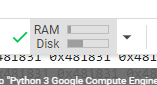    
*(Located at the top-right corner)*    
From there, you can see your active sessions.

# Reset
If nothing works properly, run this block of code. You will have to initialize waifu2x again!

In [ ]:
%cd /content
%rm -rf *